# Numerical Simulations

### Time series plots for alcohol-free equilibrium.

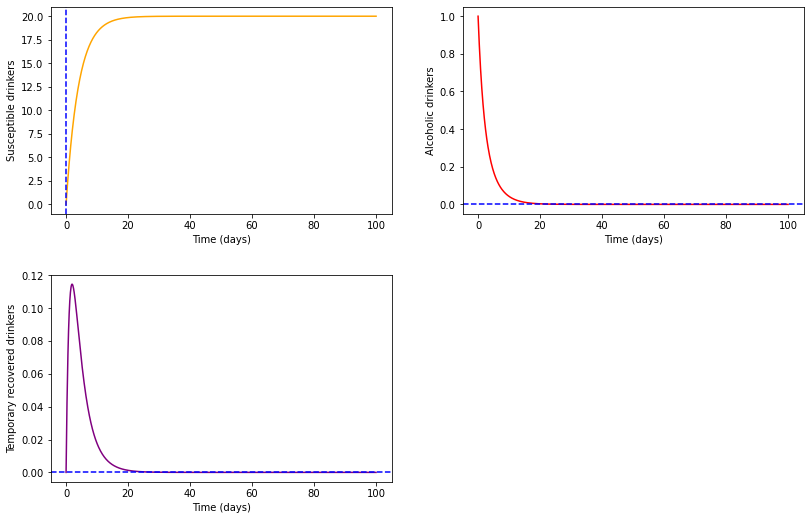

In [206]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of equations
def alcoholism_model(variables, t, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, A, R = variables
    
    dSdt = Lambda - beta*S*A - mu*S
    dAdt = beta*S*A + omega1*R - (mu +delta)*A - gamma*A/(1+kappa*A)
    dRdt = gamma*A/(1+kappa*A) - (omega1+omega2+mu)*R
    
    return [dSdt, dAdt, dRdt]

# Set the parameters
Lambda = 5
gamma = 0.2
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
beta = 0.008
kappa = 0.2

# Set the initial conditions and time points
initial_conditions = [0, 1, 0.0]



t = np.linspace(0, 100, 1000)  # Adjust the time range and number of points as needed

# Solve the system of equations
solutions = odeint(alcoholism_model, initial_conditions, t, args=(Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))



# Plot the solutions in separate subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=4.0)

# Subplot 1: Susceptible drinkers
#axs[0, 0].axhline(color='blue',linestyle='--')
axs[0, 0].plot(t, solutions[:, 0], color='orange')
axs[0, 0].axvline(x=0, color='b', linestyle='--')
axs[0, 0].set_xlabel('Time (days)')
axs[0, 0].set_ylabel('Susceptible drinkers')

# Subplot 2: Alcoholic drinkers
#axs[0, 1].axhline(color='blue',linestyle='--')
axs[0, 1].plot(t, solutions[:, 1], color='red')
axs[0, 1].axhline(y=0, color='b', linestyle='--')
axs[0, 1].set_xlabel('Time (days)')
axs[0, 1].set_ylabel('Alcoholic drinkers')

# Subplot 3: Temporary recovered drinkers
#axs[1, 0].axhline(color='blue',linestyle='--')
axs[1, 0].plot(t, solutions[:, 2], color='purple')
axs[1, 0].axhline(y=0, color='b', linestyle='--')
axs[1, 0].set_xlabel('Time (days)')
axs[1, 0].set_ylabel('Temporary recovered drinkers')

# Hide the fourth subplot
axs[1, 1].axis('off')
# Save the plot as an image with a transparent background
#plt.savefig('free_equilibrium1.png', dpi=600, bbox_inches='tight', transparent=True,facecolor='white')
plt.show()

## Steady states, alcohol-free equilibrium.

In [248]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations for A = 0
def alcohol_free_equilibrium(variables, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, R = variables
    dSdt = Lambda - beta*S*0 - mu*S
    dRdt = gamma*0/(1 + kappa*0) - (omega1 + omega2 + mu)*R
    return [dSdt, dRdt]

# Function to find the equilibrium points
def find_equilibrium_points(params):
    S, R = fsolve(alcohol_free_equilibrium, [0, 0.0], args=params)
    return S, R
#zinitial_conditions(0,0.0)
# Set the parameters
Lambda = 5
gamma = 0.2
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
beta = 0.008
kappa = 0.2

# Find the alcohol-free equilibrium point (A = 0)
equilibrium_points = find_equilibrium_points((Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))
S_eq, R_eq = equilibrium_points

# Display the results
print("Alcohol-Free Equilibrium Point (A = 0):")
print("S =", S_eq)
print("R =", R_eq)

Alcohol-Free Equilibrium Point (A = 0):
S = 20.0
R = 0.0


### Calculating the $R_0$ for alcohol-free equilibrium.

In [207]:
Lambda = 5
gamma = 0.2
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
beta = 0.008
kappa = 0.2
def calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu):
    K1 = omega1 + omega2 + mu
    K5 = Lambda * beta * K1
    A = K5/(mu*((mu + delta)* (K1) + gamma*(mu + omega2)))
    return A

In [208]:
calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu)

0.3692307692307692

### Time series plots for alcohol-present equilibrium.

1.5610859728506787


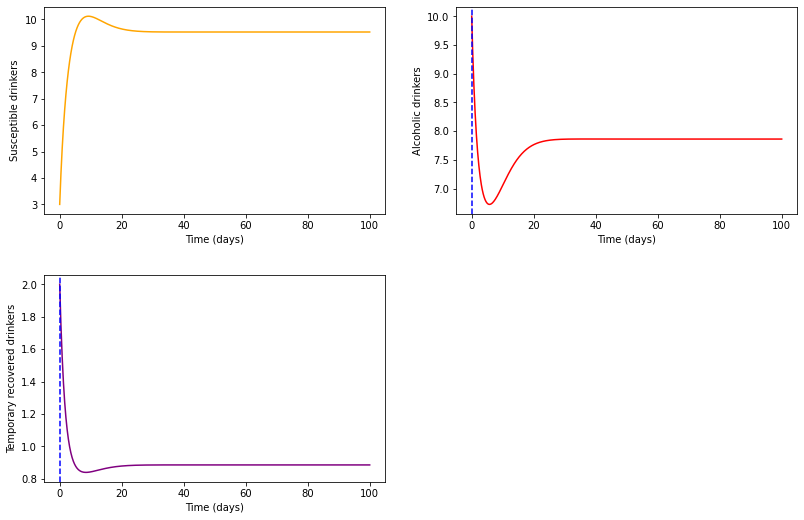

In [216]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of equations
def alcoholism_model(variables, t, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, A, R = variables
    
    dSdt = Lambda - beta*S*A - mu*S
    dAdt = beta*S*A + omega1*R - (mu +delta)*A - gamma*A/(1+kappa*A)
    dRdt = gamma*A/(1+kappa*A) - (omega1+omega2+mu)*R
    
    return [dSdt, dAdt, dRdt]

# Set the parameters
Lambda = 5
gamma = 0.2
delta = 0.01
omega1 = 0.04
omega2 = 0.4
mu = 0.25
beta = 0.035
kappa = 0.2

#False Params
# Lambda = 5
# gamma = 0.2
# delta = 0.01
# omega1 = 0.1
# omega2 = 3.0
# mu = 0.25
# beta = 0.04
# kappa = 0.2

print(calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu))
# Set the initial conditions and time points
initial_conditions = [3, 10, 2]
t = np.linspace(0, 100, 1000)  # Adjust the time range and number of points as needed

# Solve the system of equations
solutions = odeint(alcoholism_model, initial_conditions, t, args=(Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))

# Plot the solutions in separate subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=4.0)

# Subplot 1: Susceptible drinkers
axs[0, 0].plot(t, solutions[:, 0], color='orange')
axs[0, 0].set_xlabel('Time (days)')
axs[0, 0].set_ylabel('Susceptible drinkers')

# Subplot 2: Alcoholic drinkers
axs[0, 1].plot(t, solutions[:, 1], color='red')
axs[0, 1].axvline(x=0, color='b', linestyle='--')
axs[0, 1].set_xlabel('Time (days)')
axs[0, 1].set_ylabel('Alcoholic drinkers')

# Subplot 3: Temporary recovered drinkers
axs[1, 0].plot(t, solutions[:, 2], color='purple')
axs[1, 0].set_xlabel('Time (days)')
axs[1, 0].axvline(x=0, color='b', linestyle='--')
axs[1, 0].set_ylabel('Temporary recovered drinkers')

# Hide the fourth subplot
axs[1, 1].axis('off')
# Save the plot as an image with a transparent background
#plt.savefig('present_equilibrium3.png', dpi=600, bbox_inches='tight', transparent=True,facecolor='white')
plt.show()

## Steady states, alcohol present equilibrium.

In [233]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations
def alcoholism_model(variables, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, A, R = variables
    
    dSdt = Lambda - beta*S*A - mu*S
    dAdt = beta*S*A + omega1*R - (mu + delta)*A - gamma*A/(1 + kappa*A)
    dRdt = gamma*A/(1 + kappa*A) - (omega1 + omega2 + mu)*R
    
    return [dSdt, dAdt, dRdt]

# Function to find the equilibrium points
def find_equilibrium_points(params):
    S, A, R = fsolve(alcoholism_model, [3, 10, 2], args=params)
    return S, A, R
initial_conditions = [3, 10, 2]
# Set the parameters
Lambda = 5
gamma = 0.2
delta = 0.01
omega1 = 0.04
omega2 = 0.4
mu = 0.25
beta = 0.035
kappa = 0.2

# Find the alcohol present equilibrium point
equilibrium_points = find_equilibrium_points((Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))
S_eq, A_eq, R_eq = equilibrium_points

# Display the results
print("Alcohol Present Equilibrium Point:")
print("S =", S_eq)
print("A =", A_eq)
print("R =", R_eq)


Alcohol Present Equilibrium Point:
S = 9.521334504703951
A = 7.861042025538317
R = 0.8858391495139228


### Calculating $R_0$ for alcohol-present equilibrium.

In [209]:
Lambda = 5
gamma = 0.2
delta = 0.01
omega1 = 0.04
omega2 = 0.4
mu = 0.25
beta = 0.035
kappa = 0.1
def calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu):
    K1 = omega1 + omega2 + mu
    K5 = Lambda * beta * K1
    A = K5/(mu*((mu + delta)* (K1) + gamma*(mu + omega2)))
    return A

In [210]:
calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu)

1.5610859728506787

### The dynamics of the human population across various values of the contact rate β.

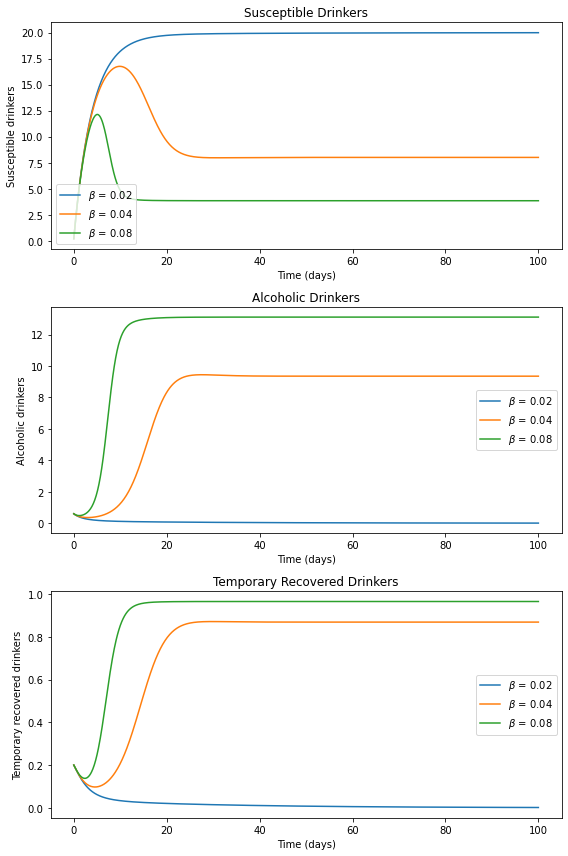

In [262]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of equations
def alcoholism_model(variables, t, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, A, R = variables
    
    dSdt = Lambda - beta*S*A - mu*S
    dAdt = beta*S*A + omega1*R - (mu +delta)*A - gamma*A/(1+kappa*A)
    dRdt = gamma*A/(1+kappa*A) - (omega1+omega2+mu)*R
    
    return [dSdt, dAdt, dRdt]

# Set the parameters
Lambda = 5
#gamma = 0.23
gamma = 0.2
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
#beta = 0.018
kappa=0.2

# Set the initial conditions and time points
initial_conditions = [0.2,0.6, 0.2]
t = np.linspace(0, 100, 1000)  # Adjust the time range and number of points as needed

# Simulated values of kappa
beta_values = [0.02, 0.04, 0.08]

# Create separate plots for each class
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the solutions for different kappa values
for beta in beta_values:
    solutions = odeint(alcoholism_model, initial_conditions, t, args=(Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))
    
    # Plot the solutions for susceptible drinkers
    axs[0].plot(t, solutions[:, 0], label=fr'$\beta$ = {beta}')

    # Plot the solutions for alcoholic drinkers
    axs[1].plot(t, solutions[:, 1], label=fr'$\beta$ = {beta}')

    # Plot the solutions for temporary recovered drinkers
    axs[2].plot(t, solutions[:, 2], label=fr'$\beta$ = {beta}')

# Set the labels and titles for each subplot
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Susceptible drinkers')
#axs[0].set_yl
axs[0].set_title('Susceptible Drinkers')

axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Alcoholic drinkers')
axs[1].set_title('Alcoholic Drinkers')
#axs[1].axvline(x=0, color='b', linestyle='--')

axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Temporary recovered drinkers')
axs[2].set_title('Temporary Recovered Drinkers')
#axs[2].axvline(x=0, color='b', linestyle='--')

# Add legends to each subplot
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Save the plot as an image
#plt.savefig('beta.png', dpi=600, bbox_inches='tight', transparent=True, facecolor='white')

# Show the plot
plt.show()


### Time series plots for alcoholism dynamics with varying $\beta$ and $\kappa$ parameters.

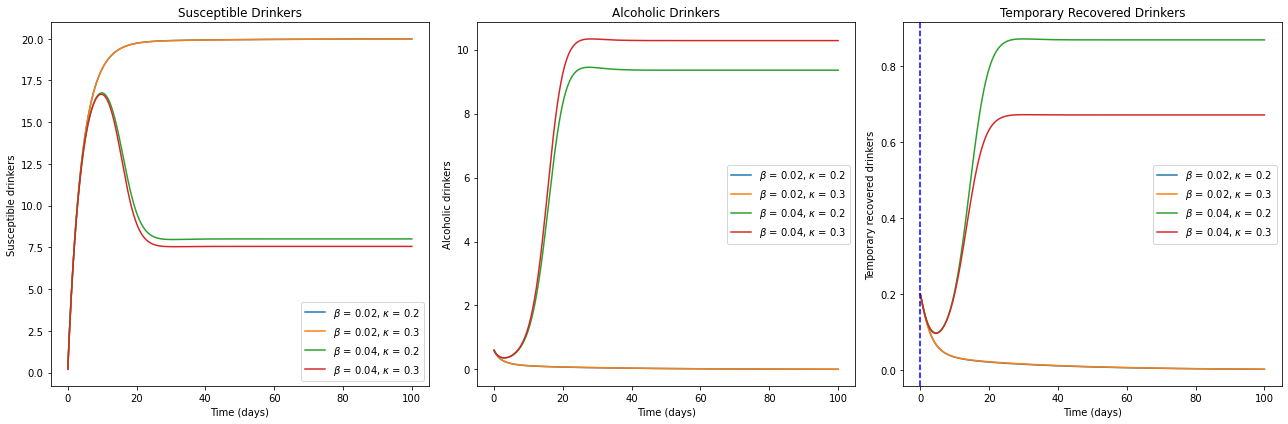

In [263]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of equations
def alcoholism_model(variables, t, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, A, R = variables
    
    dSdt = Lambda - beta*S*A - mu*S
    dAdt = beta*S*A + omega1*R - (mu +delta)*A - gamma*A/(1+kappa*A)
    dRdt = gamma*A/(1+kappa*A) - (omega1+omega2+mu)*R
    
    return [dSdt, dAdt, dRdt]

# Set the parameters
Lambda = 5
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
#kappa = 0.2

# Set the initial conditions and time points
initial_conditions = [0.2, 0.6, 0.2]
t = np.linspace(0, 100, 1000)  # Adjust the time range and number of points as needed

# Simulated values of beta and gamma
beta_values = [0.02, 0.04]
kappa_values = [0.2, 0.3]

# Create a single plot for all three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the solutions for different combinations of beta and gamma
for beta in beta_values:
    for kappa in kappa_values:
        solutions = odeint(alcoholism_model, initial_conditions, t, args=(Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))
        
        # Plot the solutions for susceptible drinkers
        axs[0].plot(t, solutions[:, 0], label=fr'$\beta$ = {beta}, $\kappa$ = {kappa}')

        # Plot the solutions for alcoholic drinkers
        axs[1].plot(t, solutions[:, 1], label=fr'$\beta$ = {beta}, $\kappa$ = {kappa}')

        # Plot the solutions for temporary recovered drinkers
        axs[2].plot(t, solutions[:, 2], label=fr'$\beta$ = {beta}, $\kappa$ = {kappa}')

# Set the labels and titles for each subplot
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Susceptible drinkers')
axs[0].set_title('Susceptible Drinkers')

axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Alcoholic drinkers')
axs[1].set_title('Alcoholic Drinkers')

axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Temporary recovered drinkers')
axs[2].set_title('Temporary Recovered Drinkers')
axs[2].axvline(x=0, color='b', linestyle='--')

# Add legends to each subplot
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Save the plot as an image
plt.savefig('beta_kap.png', dpi=600, bbox_inches='tight', transparent=True, facecolor='white')

# Show the plot
plt.show()


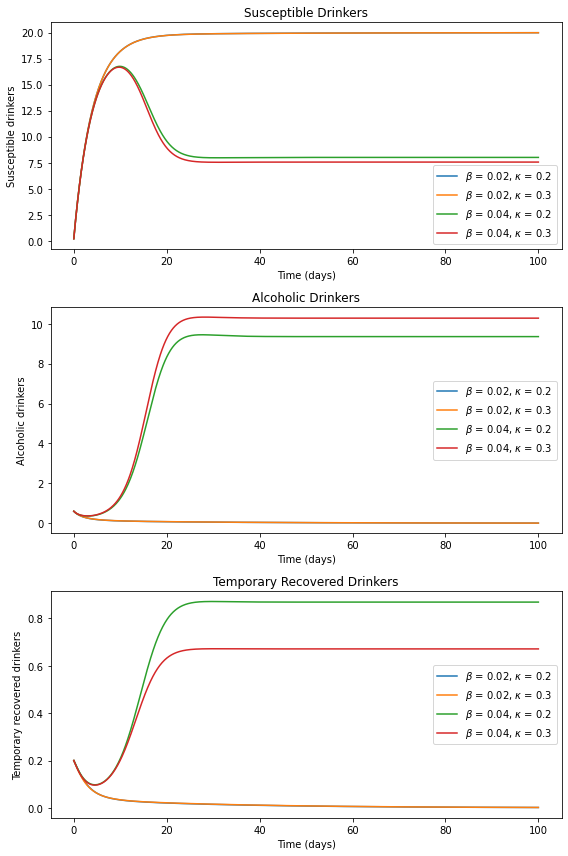

In [218]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of equations
def alcoholism_model(variables, t, Lambda, beta, mu, gamma, delta, omega1, omega2, kappa):
    S, A, R = variables
    
    dSdt = Lambda - beta*S*A - mu*S
    dAdt = beta*S*A + omega1*R - (mu +delta)*A - gamma*A/(1+kappa*A)
    dRdt = gamma*A/(1+kappa*A) - (omega1+omega2+mu)*R
    
    return [dSdt, dAdt, dRdt]

# Set the parameters
Lambda = 5
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
#kappa = 0.2

# Set the initial conditions and time points
initial_conditions = [0.2, 0.6, 0.2]
t = np.linspace(0, 100, 1000)  # Adjust the time range and number of points as needed

# Simulated values of beta and gamma
beta_values = [0.02, 0.04]
kappa_values = [0.2, 0.3]

# Create separate plots for each class
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the solutions for different combinations of beta and gamma
for beta in beta_values:
    for kappa in kappa_values:
        solutions = odeint(alcoholism_model, initial_conditions, t, args=(Lambda, beta, mu, gamma, delta, omega1, omega2, kappa))
        
        # Plot the solutions for susceptible drinkers
        axs[0].plot(t, solutions[:, 0], label=fr'$\beta$ = {beta}, $\kappa$ = {kappa}')

        # Plot the solutions for alcoholic drinkers
        axs[1].plot(t, solutions[:, 1], label=fr'$\beta$ = {beta}, $\kappa$ = {kappa}')

        # Plot the solutions for temporary recovered drinkers
        axs[2].plot(t, solutions[:, 2], label=fr'$\beta$ = {beta}, $\kappa$ = {kappa}')

# Set the labels and titles for each subplot
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Susceptible drinkers')
axs[0].set_title('Susceptible Drinkers')

axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Alcoholic drinkers')
axs[1].set_title('Alcoholic Drinkers')

axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Temporary recovered drinkers')
axs[2].set_title('Temporary Recovered Drinkers')

# Add legends to each subplot
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Save the plot as an image
plt.savefig('beta_gamma.png', dpi=600, bbox_inches='tight', transparent=True, facecolor='white')

# Show the plot
plt.show()


# Sensitivity Analysis of $R_0$.

## Contour plot for $R_0$ as a bfunction of $\beta$ and $\gamma$.

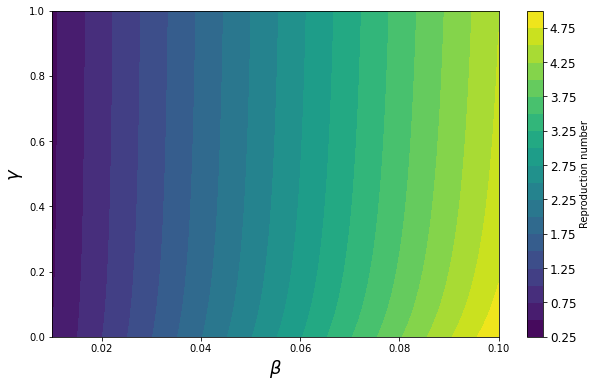

In [221]:

import numpy as np
import matplotlib.pyplot as plt

# Parameter values
Lambda = 5
#gamma = 0.23
delta = 0.01
omega1 = 0.1
omega2 = 0.4
mu = 0.25
#beta = 0.018
kappa = 0.2

def calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu):
    K1 = omega1 + omega2 + mu
    K5 = Lambda * beta * K1
    A = K5/(mu*((mu + delta)* (K1) + gamma*(mu + omega2)))
    return A

# Range of beta and alpha1 values
beta_values = np.linspace(0.01, 0.1, 100)
gamma_values = np.linspace(0.1, 1.0, 100)

# Create a grid of beta and alpha1 values
beta_grid, gamma_grid = np.meshgrid(beta_values, omega2_values)

# Initialize an empty matrix to store R0 values
R0_grid = np.zeros_like(beta_grid)

# Calculate R0 for each combination of beta and alpha1
for i in range(len(beta_values)):
    for j in range(len(gamma_values)):
        beta = beta_values[i]
        omega2 = omega2_values[j]
        R0 = calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu)
        R0_grid[j, i] = R0

# Create the stability plot
plt.figure(figsize=(10, 6))
plt.contourf(beta_grid, omega2_grid, R0_grid, levels=20, cmap='viridis')
cbar = plt.colorbar(label='Reproduction number')
cbar.ax.tick_params(labelsize=12)
plt.xlabel(r'$\beta $',fontsize=18)
plt.ylabel(r'$\gamma$',fontsize=18)
#plt.title('Stability Plot of the Reproduction number', fontweight='bold',fontsize=14)
#plt.savefig("contour1.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Contour plot for $R_0$ as a function of $\omega_1$ and $\omega_2$.

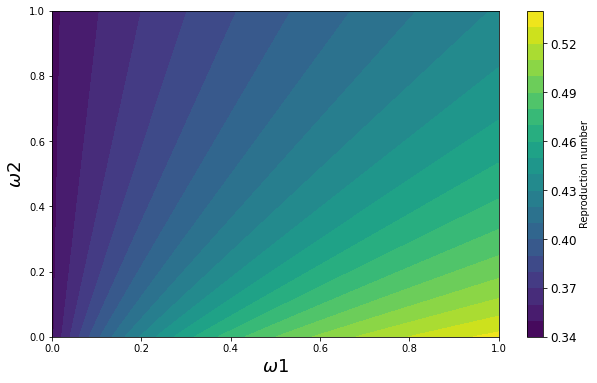

In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
Lambda = 5
#gamma = 0.23
gamma=0.2
delta = 0.01
#omega1 = 0.1
#omega2 = 0.4
mu = 0.25
#beta = 0.018
beta=0.008
kappa = 0.2

def calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu):
    K1 = omega1 + omega2 + mu
    K5 = Lambda * beta * K1
    A = K5/(mu*((mu + delta)* (K1) + gamma*(mu + omega2)))
    return A

# Range of beta and alpha1 values
#omega1_values = np.linspace(0.1, 1.0, 100)
#omega2_values = np.linspace(0.1, 1.0, 100)
omega1_values = np.linspace(0, 1, 100)
omega2_values = np.linspace(0, 1, 100)


# Create a grid of beta and alpha1 values
omega1_grid, omega2_grid = np.meshgrid(omega1_values, omega2_values)

# Initialize an empty matrix to store R0 values
R0_grid = np.zeros_like(omega1_grid)

# Calculate R0 for each combination of beta and alpha1
for i in range(len(omega1_values)):
    for j in range(len(omega2_values)):
        omega1 = omega1_values[i]
        omega2 = omega2_values[j]
        R0 = calc_R0(Lambda, beta, omega2, gamma, omega1, delta, mu)
        R0_grid[j, i] = R0

# Create the stability plot
plt.figure(figsize=(10, 6))
plt.contourf(omega1_grid, omega2_grid, R0_grid, levels=20, cmap='viridis')
cbar = plt.colorbar(label='Reproduction number')
cbar.ax.tick_params(labelsize=12)
plt.xlabel(r'$\omega1$',fontsize=18)
plt.ylabel(r'$\omega2$',fontsize=18)
#plt.title('Stability Plot of the Reproduction number', fontweight='bold',fontsize=14)
#plt.savefig("contour2.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()